# Assignment 2 - Essential Concepts in Quantum Computing
In class you have learned about entangling operations like the controlled-not (CNOT) and controlled-Z (CZ) gates which allow us to create non-separable qubit states. In this assignment we are going to explore how these gates affect the ways in which we measure and manipulate qubits. For reference, the $4 \times 4$ matrices which represent the CNOT and CZ gates are:

$CNOT = \begin{bmatrix} 1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{bmatrix}\;\;\;\;\;\; CZ = \begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1\end{bmatrix}$

We will also be using the Hadamard (H) gate in this assignment. Its matrix is:

$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

#### Run these cells before beginning to import necessary packages.
This cell may take a minute or more to complete. Importing qsharp triggers a sequence of actions which allow us to compile and run Q# code in this notebook.

In [2]:
import qsharp
import qsharp.azure
import matplotlib.pyplot as plt

Preparing Q# environment...
.

In [3]:
%%qsharp 
open Microsoft.Quantum.Diagnostics; 
open Microsoft.Quantum.Canon;
open Microsoft.Quantum.Arrays;

### <span style="color:#61c2e8">Task 1</span>: Bell States and Partial Measurement
The simplest entangled state which can be prepared is the Bell state. The state vector of the Bell state is: $$\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) = \frac{1}{\sqrt{2}}\begin{bmatrix}1\\0\\0\\1\end{bmatrix}$$
Below is Q# code for creating the Bell state.

In [3]:
%%qsharp

/// # Summary
/// Creates a Bell pair and then prints the state vector using DumpMachine() 

operation Bell() : Unit {
    // Allocate two qubits, both start in the |0⟩ state
    use qs = Qubit[2];     
    // Apply a Hadamard gate to qubit 0
    H(qs[0]);    
    // Apply a CNOT gate with qubit 0 as the control and qubit 1 as the target
    CNOT(qs[0], qs[1]); 
    // Print the current state 
    DumpMachine(); 
    
    // In Q# you are required to measure qubits or return them to the |0⟩
    // state by uncomputing them when you are done with them
    // When you measure a qubit it is measured and then set to the |0⟩ state.
    ResetAll(qs);
}

In [4]:
Bell.simulate()

|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0.7071067811865476 + 0𝑖

()

Here we see a printout of the current state vector. Notice how it is a superposition of only two basis states, $|00\rangle$ and $|11\rangle$ (the default configs use a little endian base 10 encoding, so these appear as $|0\rangle$ and $|3\rangle$). This means that when we measure both qubits, they will either both be 0 or both be 1.

> For reference, [here](https://docs.microsoft.com/en-us/azure/quantum/user-guide/testing-debugging?tabs=tabid-vs2022#dumpmachine) is the documentation for DumpMachine() - the function that produces the dump of the quantum state of the program you can see above. 

Let's now consider what happens when we perform a partial measurement on a Bell pair. That is to say, when we measure one qubit in the pair, how will it modify the state of the other?

In [84]:
%%qsharp
/// # Summary
/// Creates a Bell pair and outputs the state vector before
/// and after performing measurement on half of the pair.

operation BellPartial() : Unit {
    // Allocate 2 qubits
    use qs = Qubit[2]; 
    // Use a Hadamard gate on qubit 0
    H(qs[0]); 
    // CNOT on qubit 1 controlled by qubit 0
    CNOT(qs[0], qs[1]); 
    // Print current state vector
    DumpMachine(); 
    // Measure qubit 0 and print out result
    let res = M(qs[0]);     
    Message($"Our first qubit has measured as {res}");
    // Show new state vector
    DumpMachine(); 
    // Reset both of our qubits
    ResetAll(qs);
}

In [85]:
BellPartial.simulate()

|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0.7071067811865476 + 0𝑖

Our first qubit has measured as Zero


|0⟩	1 + 0𝑖
|1⟩	0 + 0𝑖
|2⟩	0 + 0𝑖
|3⟩	0 + 0𝑖

()

### <span style="color:#61c2e8">Task 1 Questions</span>:
* T1.1. Explain what is happening above to the second qubit when partial measurement is performed. Address the two states which are printed out and explain why they are different. What are the two possible outputs of this code?

The given Bell state is $\frac{1}{\sqrt{2}}\left( \ket{00} + \ket{11} \right)$. First the code segment above is applying the Hadamard gate onto the state $\ket{0}$. This is the same as performing the following operation, $\frac{1}{\sqrt{2}} \left( \ket{0} + \ket{1} \right) \otimes \ket{0}$ which produces the result $\frac{1}{\sqrt{2}}\left( \ket{00} + \ket{10} \right)$. Then the CNOT operator is being applied to the result of the previous calculation. Which is producing the result $\frac{1}{\sqrt{2}} \left( \ket{00} + \ket{11} \right)$. When we measure the first qubit we have an equal probability of measuring $0$ or $1$. If the first measured qubit is $0$ then the next qubit measured will be $0$ with certainty, simsimilarly if the first qubit measured is $1$ then the next qubit measured will be $1$ with certainty. This is because if we measure both qubits we would get either $\ket{00}$ or $\ket{11}$ with equal probability. Therefore, the two possible states that can result from the above code segment are $\ket{00}$ or $\ket{11}$. 

The first printout of the above code segment gives the Bell state before the measurement operation. Therefore, the state $\ket{00}$ has a coefficient of $1/\sqrt{2}$ and the state $\ket{11}$ has a coefficient of $1/\sqrt{2}$ and the rest of the states have a coefficient of 0. Once the measurement is taken for the first qubit, if the measurement turns out to be $0$ (that is eigenvalue of $1$ for the Puali-z matrix) then the state of the system that will be shown by the command **DumpMachine()** will be $1 + 0i$, $0 + 0i$, $0 + 0i$, and $0 + 0i$ (indicating the amplitude column), because the measured system will be $\ket{00}$. However, if the measurement of the first qubit is $1$ (that is eigenvalue of $0$ for the Puali-z matrix) then the state of the system that will be shown by the command **DumpMachine()** will be $0 + 0i$, $0 + 0i$, $0 + 0i$, and $1 + 0i$ (indicating the amplitude column) because the measured system will be $\ket{11}$.

### <span style="color:#61c2e8">Task 2</span>: Running on an IonQ Quantum Computer 
When we measure both qubits of a Bell state, we always measure $|00\rangle$ or $|11\rangle$. While this is true when running the code on a simulator, real quantum devices are noisy! Because of this, occasionally we will measure the $|01\rangle$ and $|10\rangle$ states when we run the code on a quantum computer.

To see this, let's run this code on a real quantum computer. Whenever executing on real hardware, we lose the ability to view the current quantum state of the program using DumpMachine() - using this convenient tool is only possible in simulations. Instead, we must measure the qubits of interest and return a Result array.

In [86]:
%%qsharp

/// # Summary
/// Creates a Bell pair and then measures both qubits and returns the results in an array
///
/// # Output
/// An array of length 2. Contains the measurement results of the Bell pair which was prepared. 

operation BellReal() : Result[] {
    // Allocate Qubits
    use qs = Qubit[2]; 
    // Hadamard on qubit 0
    H(qs[0]);     
    // CNOT control qubit 0, target qubit 1
    CNOT(qs[0], qs[1]); 
    // Loop through qs measuring each qubit and then return the accumulated results
    return ForEach(M, qs); 
}

Below is the Python code for connecting to your Azure Quantum Workspace and submitting a job to the IonQ full state simulator. Run each cell in order.


Connect to Azure and set the execution target for your job. You will need to input your location and resourceID, which can be found in the Azure Portal on the overview page in your quantum workspace. 

If you want to run multiple jobs on the same execution target, you only need to set it once. You'll need to run `qsharp.azure.target` again only when switching to a different target. 

In [87]:
# Put your Resource ID and location INSIDE the quotation marks
qsharp.azure.connect(
   resourceId="/subscriptions/476fe4b3-6f35-4af3-8050-b3b41a795058/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/IntroToQuantumProj",
   location="East US") 
qsharp.azure.target("ionq.simulator")


Connecting to Azure Quantum...

Authenticated using Microsoft.Azure.Quantum.Authentication.TokenFileCredential


Connected to Azure Quantum workspace IntroToQuantumProj in location eastus.
Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.simulator


{'id': 'ionq.simulator', 'current_availability': {}, 'average_queue_time': 3}

Submit the operation you want to run.

In [102]:
qsharp.azure.submit(BellReal, shots=1000, jobName="Bell State on IonQ simulator")

Submitting BellReal to target ionq.simulator...
Job successfully submitted.
   Job name: Bell State on IonQ simulator
   Job ID: c3eb6c11-981d-445f-af46-a80debecbbd6


{'id': 'c3eb6c11-981d-445f-af46-a80debecbbd6', 'name': 'Bell State on IonQ simulator', 'status': 'Waiting', 'uri': 'https://portal.azure.com/#@microsoft.onmicrosoft.com/resource/subscriptions/476fe4b3-6f35-4af3-8050-b3b41a795058/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/IntroToQuantumProj/job_management?microsoft_azure_quantum_jobid=c3eb6c11-981d-445f-af46-a80debecbbd6', 'provider': 'ionq', 'target': 'ionq.simulator', 'creation_time': '2022-12-09T07:35:58.2946703+00:00', 'begin_execution_time': None, 'end_execution_time': None, 'cost_estimate': ''}

Check the status of the job. By default, this command checks the last job submitted. If you want to check the status of a different job, you need to pass it the ID of that job.

In [103]:
qsharp.azure.status()
# Here is how you can change the job which is checked.
# qsharp.azure.status(jobId="########-####-####-####-####-############")

{'id': 'c3eb6c11-981d-445f-af46-a80debecbbd6', 'name': 'Bell State on IonQ simulator', 'status': 'Succeeded', 'uri': 'https://portal.azure.com/#@microsoft.onmicrosoft.com/resource/subscriptions/476fe4b3-6f35-4af3-8050-b3b41a795058/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/IntroToQuantumProj/job_management?microsoft_azure_quantum_jobid=c3eb6c11-981d-445f-af46-a80debecbbd6', 'provider': 'ionq', 'target': 'ionq.simulator', 'creation_time': '2022-12-09T07:35:58.2946703+00:00', 'begin_execution_time': '2022-12-09T07:36:02.919+00:00', 'end_execution_time': '2022-12-09T07:36:02.952+00:00', 'cost_estimate': '$0.00'}

Output the results of the job. By default, this command uses the last job submitted, but you can query outputs of other jobs in the same way as `qsharp.azure.status()`.

Running this job on the IonQ simulator can take a couple of minutes, so make sure the job status is `Succeeded` before checking the output.

In [104]:
qsharp.azure.output()
# Here is how you can check the output of other jobs.
# qsharp.azure.output(jobId="########-####-####-####-####-############")

Result,Frequency,Histogram
"[0,0]",0.5,
"[1,1]",0.5,


Let's now compare this output to the output we get from running this operation on the IonQ QPU (Quantum Processing Unit). Note the queue time in seconds when running this command. It may take a while for jobs submitted to the IonQ QPU to complete. 

In [35]:
qsharp.azure.target("ionq.qpu")

Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.qpu


{'id': 'ionq.qpu', 'current_availability': {}, 'average_queue_time': 56812}

Note the queue time reported by the QPU target. It is typically a lot longer than the time for the simulator, so getting the results of your job might take a while. Note the job ID of the submitted job, so that you can return to the notebook several hours later to check its status. You can always find the job ID of any job in your Azure Quantum workspace in Operations $\rightarrow$ Job Management.

In [76]:
qsharp.azure.submit(BellReal, shots=200, jobName = "Bell state on IonQ QPU")

Submitting BellReal to target ionq.qpu...
Job successfully submitted.
   Job name: Bell state on IonQ QPU
   Job ID: 1548db37-65e1-4ddb-af57-d39806835377


{'id': '1548db37-65e1-4ddb-af57-d39806835377', 'name': 'Bell state on IonQ QPU', 'status': 'Waiting', 'uri': 'https://portal.azure.com/#@microsoft.onmicrosoft.com/resource/subscriptions/476fe4b3-6f35-4af3-8050-b3b41a795058/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/IntroToQuantumProj/job_management?microsoft_azure_quantum_jobid=1548db37-65e1-4ddb-af57-d39806835377', 'provider': 'ionq', 'target': 'ionq.qpu', 'creation_time': '2022-12-09T07:20:11.1451466+00:00', 'begin_execution_time': None, 'end_execution_time': None, 'cost_estimate': ''}

In [78]:
qsharp.azure.status()

{'id': '1548db37-65e1-4ddb-af57-d39806835377', 'name': 'Bell state on IonQ QPU', 'status': 'Succeeded', 'uri': 'https://portal.azure.com/#@microsoft.onmicrosoft.com/resource/subscriptions/476fe4b3-6f35-4af3-8050-b3b41a795058/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/IntroToQuantumProj/job_management?microsoft_azure_quantum_jobid=1548db37-65e1-4ddb-af57-d39806835377', 'provider': 'ionq', 'target': 'ionq.qpu', 'creation_time': '2022-12-09T07:20:11.1451466+00:00', 'begin_execution_time': '2022-12-09T07:21:22.439+00:00', 'end_execution_time': '2022-12-09T07:21:25.187+00:00', 'cost_estimate': '$0.00'}

In [79]:
qsharp.azure.output()

Result,Frequency,Histogram
"[0,0]",0.455,
"[1,0]",0.005,
"[0,1]",0.015,
"[1,1]",0.525,


### <span style="color:#61c2e8">Task 2 Questions</span>:
* T2.1. Compare the results of execution on the simulator vs the QPU. What could be causing these differences?

* T2.2. Let's say that you have prepared a Bell state on a quantum computer which has noiseless gates. However, the measurement on this device is not noiseless. There is a 0.1 probability that when you measure a qubit, a bit flip will be occur. Calculate the new probability of measuring $|00\rangle$ on this device.

### <span style="color:#61c2e8">Extra Credit Question</span>:
* T2.3. Try running the job on the IonQ simulator several times. Do you observe a variation in the results? How can you explain this? For more information check here: [IonQ Provider](https://learn.microsoft.com/en-us/azure/quantum/provider-ionq)

##### T 2.1

The output of the simulator and the QPU are shown above. These outputs are similar as the simulator tries to replicate the processing of the QPU but due to the nature of random noise induced in the simulator and QPU they will not be the same. In general we expect the result $[0,0]$ and $[1,1]$ to have a frequency close to $0.5$ and the other results to have a frequency close to $0$.

##### T 2.2

The probability of measuring the state $\ket{00}$ is $0.5$ in a noiseless gate. The probability of a bit flip not occuring during measurement is $0.9$. Therefore, the probability of measuring the state $\ket{00}$ is $0.5 * 0.9 = 0.45$. Therefore, the probability of measuring the state $\ket{00}$ with a $0.1$ bit flip probability is $0.45$.

##### T 2.3 (Extra Credit)

I ran the job on the IonQ simulator and the IonQ QPU several times and recorded my results as shown below. In general, the IonQ QPU Simulator is able to output the ideal results while the IonQ QPU is only able to output approximate results of the theoretical results.

The results of the IonQ QPU are tabulated below.
| Result | Frequency 1 | Frequency 2 | Frequency 3 |Frequency 4 |Frequency 5 |
| :---:  | :---:       | :---:       | :---:       | :---:      | :---:      |
| [0,0]  | 0.525       | 0.515       | 0.465       | 0.5        | 0.455      |
| [1,0]  | 0.005       | 0           | 0.005       | 0          | 0.005      |
| [0,1]  | 0.01        | 0           | 0.01        | 0.025      | 0.015      |
| [1,1]  | 0.46        | 0.485       | 0.52        | 0.475      | 0.525      |

The results of the IonQ Simulator are tabulated below.
| Result | Frequency 1 | Frequency 2 | Frequency 3 |Frequency 4 |Frequency 5 |
| :---:  | :---:       | :---:       | :---:       | :---:      | :---:      |
| [0,0]  | 0.5         | 0.5         | 0.5         | 0.5        | 0.5        |
| [1,0]  | 0           | 0           | 0           | 0          | 0          |
| [0,1]  | 0           | 0           | 0           | 0          | 0          |
| [1,1]  | 0.5         | 0.5         | 0.5         | 0.5        | 0.5        |

As seen by the table above, the IonQ Simulator is able to simulate the QPU without the noise. There are a few possibilities for this. One such possibility is that the IonQ simulator simulates the a 23 qubit quantum computer while the IonQ Harmonic QPU has 11 qubits and the IonQ Aria QPU has 23 qubits. The simulator is much more powerful and hence can perform more demanding tasks with better precision. Another possibility is that the simulator is free from the noise in the IonQ Harmonic QPU and the IonQ Aria QPU.

### <span style="color:#61c2e8">Task 3</span>: Exploring Different Entangled States
When we measure both qubits of a Bell state, we will get $|00\rangle$ and $|11\rangle$ with equal probability. But we can actually manipulate these probabilities by changing how the control qubit is initialized before the CNOT gate is applied. The probabilities of measuring our control qubit in the $|0\rangle$ and $|1\rangle$ states will become the probabilities of measuring $|00\rangle$ and $|11\rangle$. Below is code which demonstrates this: we can use an $R_Y(\theta)$ gate with a varying $\theta$ to sweep over a range of states.

In [5]:
%%qsharp
/// # Summary
/// Creates an entangled state by first applying an Ry rotation and then a CNOT gate.
///
/// # Input
/// ## theta
/// Degree in radians which is passed to the Ry gate.
///
/// # Output
/// Result array containing measurement result on the two qubit entangled state.

operation VaryingBell(theta : Double) : Result[] {
    // Allocate qubits
    use qs = Qubit[2];     
    // Apply Ry gate of theta radians 
    Ry(theta, qs[0]);
    // Controlled not between qubit 0 and qubit 1
    CNOT(qs[0], qs[1]);     
    // Return the measurement results
    return ForEach(M, qs); 
}

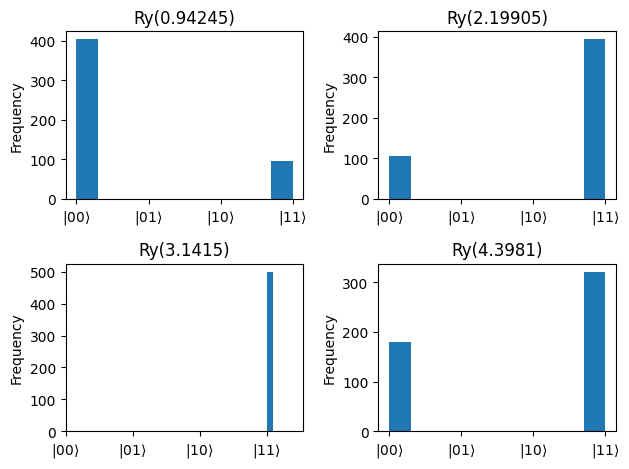

In [6]:
pi = 3.1415
# Theta values to test
thetaRange = [.3*pi, .7*pi, pi, 1.4*pi] 
# Number of times to sample the circuit
shots = 500

for (theta_i, theta) in enumerate(thetaRange):
    results = []
    for shot in range(shots):
        result = VaryingBell.simulate(theta=theta)
        num = 0
        for (idx, bit) in enumerate(result):
            # This converts the bits in result into a number between 0 and 3
            # The least significant bit is stored in the first index of result
            num = num + (bit * 2**idx) 
        results.append(num)
    # Plot our results
    ax = plt.subplot(2, 2, theta_i+1)
    plt.hist(results) 
    plt.ylabel("Frequency")
    ax.set_xticks([0, 1, 2, 3], labels=[r"$|00\rangle$", r"$|01\rangle$", r"$|10\rangle$", r"$|11\rangle$"])
    plt.title("Ry({})".format(theta))
plt.tight_layout()
plt.show()

We can make this more interesting. Even in noiseless simulations there are entangled states where we will measure not just two states but a range of possible distributions over the measurement space. We can create a state like this using the $R_X(\theta), R_Y(\theta)$ and the $R_Z(\theta)$ gates. One way to do this is to perform additional gate operations after creating a Bell pair.

A key thing to realize here is that we are in essence preparing a distribution over measurement space.  

In [7]:
%%qsharp
/// # Summary
/// Creates an entangled state by first creating a Bell pair and then applying the Ry gate to one of the qubits.
///
/// # Input
/// ## theta
/// Degree in radians which is passed to the Ry gate.
///
/// # Output
/// Result array containing measurement result on the two qubit entangled state.

operation VaryingDistribution(theta : Double) : Result[] {
    use qs = Qubit[2];
    H(qs[0]);
    CNOT(qs[0], qs[1]);
    Ry(theta, qs[0]);
    return ForEach(M, qs);
}

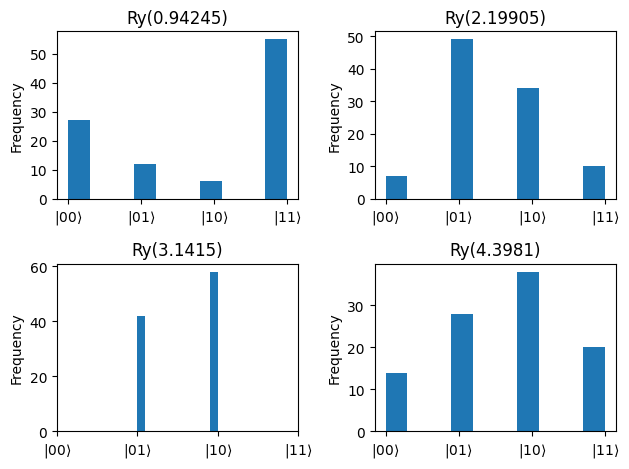

In [8]:
pi = 3.1415
# Range of theta values to test
thetaRange = [.3*pi, .7*pi, pi, 1.4*pi] 
shots = 100
for (theta_i, theta) in enumerate(thetaRange):
    results = []
    for shot in range(shots):
        result = VaryingDistribution.simulate(theta=theta)
        num = 0
        for (idx, bit) in enumerate(result):
            # Convert binary to decimal
            # The least significant bit is stored in the first index of result
            num = num + (bit * 2**idx)
        results.append(num)
    # Plot results
    ax = plt.subplot(2, 2, theta_i+1)
    plt.hist(results) 
    plt.ylabel("Frequency")
    ax.set_xticks([0, 1, 2, 3], labels=[r"$|00\rangle$", r"$|01\rangle$", r"$|10\rangle$", r"$|11\rangle$"])
    plt.title("Ry({})".format(theta))

plt.tight_layout()
plt.show()

With entangled states like these, a partial measurement on one qubit will not yield as much information about the state of the second qubit as in the case of the Bell state.

### <span style="color:#61c2e8">Task 3 Questions</span>: 
* T3.1. Calculate the resulting state from applying the $R_Y(\theta)$ gate to the state $\begin{bmatrix} \alpha \\ \beta \end{bmatrix}$.

* T3.2. Let's say we have the state $$|\psi_1\psi_2\rangle = \alpha_{00}|00\rangle + \alpha_{01}|01\rangle + \alpha_{10}|10\rangle + \alpha_{11}|11\rangle$$ Next we apply a CNOT gate to both qubits with $|\psi_1\rangle$ as the control. Derive an expression for the probability of $|\psi_2\rangle$ being measured in the $|0\rangle$ state.

* T3.3. Consider the state generated in the last Q# code cell by applying the $R_Y(\theta)$ gate to the first qubit in the Bell state. For $\theta = \frac{\pi}{4}$ calculate the probability of measuring the target qubit as $|0\rangle$ after measuring the control qubit in the $|1\rangle$ state.  

##### T3.1

The $R_y(\theta)$ gate is defined below.
$$
    R_y(\theta) = \begin{pmatrix}
                  \cos(\theta/2) & -\sin(\theta/2) \\
                  \sin(\theta/2) &  \cos(\theta/2)
                  \end{pmatrix}
$$
By applying the $R_y(\theta)$ gate to the state $[\alpha\quad\beta]^\intercal$ we get the resulting matrix.
$$
\begin{align*}
    R_y(\theta)\;\begin{bmatrix}
                 \alpha \\
                 \beta
                 \end{bmatrix}
    &=
    \begin{pmatrix}
    \cos(\theta/2) & -\sin(\theta/2) \\
    \sin(\theta/2) &  \cos(\theta/2)
    \end{pmatrix}
      * 
      \begin{bmatrix}
      \alpha \\
      \beta
      \end{bmatrix} \\
    &= \begin{bmatrix}
       \alpha\cos(\theta/2)-\beta\sin(\theta/2) \\
       \alpha\sin(\theta/2)+\beta\cos(\theta/2)
       \end{bmatrix}
\end{align*}
$$

##### T 3.2

We are given the following equation.
$$
    \ket{\psi_1\psi_2} = \alpha_{00}\ket{00} + \alpha_{01}\ket{01} + \alpha_{10}\ket{10} + \alpha_{11}\ket{11}
$$
By applying the CNOT gate to the above equation we get the following equation.
$$
    CNOT(\ket{\psi_1\psi_2}) = \alpha_{00}\ket{00} + \alpha_{01}\ket{01} + \alpha_{11}\ket{10} + \alpha_{10}\ket{11} 
$$
Therefore, 
$$
\begin{align*}
    \text{Pr}\{\ket{\psi_2}\text{being measured in the }\ket{0}\text{ state}\} &= \\
    \text{Pr}\{00\} + \text{Pr}\{10\} = |\alpha_{00}|^2 + |\alpha_{11}|^2
\end{align*}
$$

##### T 3.3 

We need to compute the following probability.
$$
    \text{Pr}(\text{target Qubit is measured as }\ket{0} | \text{control Qubit is measured as }\ket{1})
$$
Control Qubit is measured in the $\ket{1}$ state. Without rotation of the control Qubit the target Qubit will be measured as $\ket{1}$ with probability $1$ and $\ket{0}$ with probability $0$. The target Qubit will be measured as the following.
$$
\begin{pmatrix}
    0 \\
    1
\end{pmatrix}
$$
Now, because the control Qubit is rotated by $\theta$, and the control and target Qubit are entangled in the Bell State, the target Qubit will also be rotated by $\theta$. Therefore, the target Qubit will be measured as the following.
$$
\begin{pmatrix}
    \cos(\theta/2) & -\sin(\theta/2) \\
    \sin(\theta/2)  & \cos(\theta/2)
\end{pmatrix}
\begin{pmatrix}
    0 \\
    1
\end{pmatrix}
= -\sin(\theta/2)\ket{0} + \cos(\theta/2)\ket{1}
$$

Therefore, $\text{Pr}(\text{target Qubit measured as }\ket{0})=(-\sin(\theta/2))^2=\sin^2(\theta/2)$.
By replacing $\theta$ with $\pi/8$ we get the following, $\sin^2(\pi/8)=0.1464$